# Making a word cloud from Excel file

[wordcloud](http://amueller.github.io/word_cloud/index.html)

In [1]:
%%html

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').css('opacity', 0);  // do not show output prompt
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to hide/unhide code."></form>

You will be prompted to enter vehicle make ("honda" or "acura")

Enter make ( honda|acura ): acura


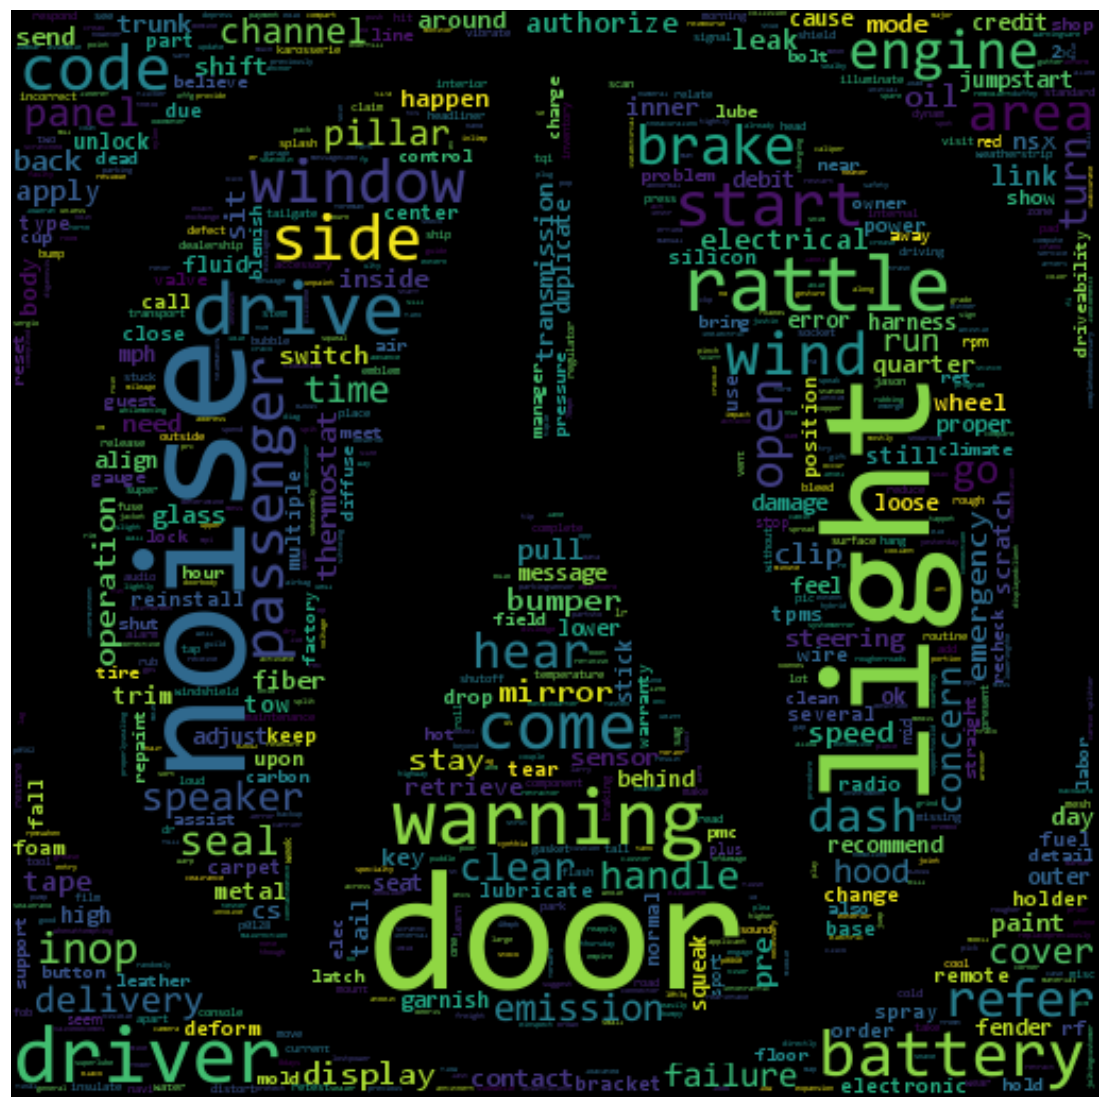

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.ticker import NullLocator
from wordcloud import WordCloud, STOPWORDS

# Exclude non-value added words that are almost always used in the contention text
# Alternative would be store custom list of words in a text file and read them in as stop words
STOPWORDS.add('acura')
STOPWORDS.add('authorize')
STOPWORDS.add('dpsm')
STOPWORDS.add('approve')
STOPWORDS.add('assembly')
STOPWORDS.add('assy')
STOPWORDS.add('customer')
STOPWORDS.add('client')
STOPWORDS.add('correct')
STOPWORDS.add('cust')
STOPWORDS.add('check')
STOPWORDS.add('bad')
STOPWORDS.add('car')
STOPWORDS.add('confirm')
STOPWORDS.add('confirmed')
STOPWORDS.add('diagnose')
STOPWORDS.add('goodwill')
STOPWORDS.add('honda')
STOPWORDS.add('sop')
STOPWORDS.add('replace')
STOPWORDS.add('replaced')
STOPWORDS.add('repl')
STOPWORDS.add('report')
STOPWORDS.add('reports')
STOPWORDS.add('state')
STOPWORDS.add('states')
STOPWORDS.add('report')
STOPWORDS.add('find')
STOPWORDS.add('perform')
STOPWORDS.add('performed')
STOPWORDS.add('please')
STOPWORDS.add('pls')
STOPWORDS.add('checked')
STOPWORDS.add('found')
STOPWORDS.add('advise')
STOPWORDS.add('advised')
STOPWORDS.add('inspect')
STOPWORDS.add('inspected')
STOPWORDS.add('inspection')
STOPWORDS.add('install')
STOPWORDS.add('tech')
STOPWORDS.add('technician')
STOPWORDS.add('new')
STOPWORDS.add('repair')
STOPWORDS.add('test')
STOPWORDS.add('please')
STOPWORDS.add('request')
STOPWORDS.add('remove')
STOPWORDS.add('removed')
STOPWORDS.add('per')
STOPWORDS.add('c')
STOPWORDS.add('s')
STOPWORDS.add('sublet')
STOPWORDS.add('techline')
STOPWORDS.add('unknown')
STOPWORDS.add('vehicle')
STOPWORDS.add('veh')
STOPWORDS.add('verify')
STOPWORDS.add('verified')
STOPWORDS.add('will')

stopwords = set(STOPWORDS)

df = pd.read_excel(r'D:\temp\modelx.xlsx', sheetname='Claims')

make = input("Enter make ( honda|acura ): ")

text = ''
for row in df.CUST_CONTENTION_TEXT_ENRICHED.values:
    text = text + str(row).lower() + ' '

# read the proper mask image based on make
if make.lower() == 'honda':
    image_mask = np.array(Image.open(r'D:\jupyter\wordcloud\honda_logo.png'))
else:
    image_mask = np.array(Image.open(r'D:\jupyter\wordcloud\acura_logo.png'))

wc = WordCloud(max_words=1000, mask=image_mask, background_color='black',
               stopwords=stopwords, collocations=False, font_path=r'C:\Windows\Fonts\consola.ttf')
    
# generate word cloud
wc.generate(text)

# store to file
#wc.to_file(r'D:\temp\Acura_WordCloud.png')

# show
plt.imshow(wc, interpolation='bilinear')
plt.gca().xaxis.set_major_locator(NullLocator())   # remove white space
plt.gca().yaxis.set_major_locator(NullLocator())   # remove white space
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.gca().set_axis_off()
fig.savefig(r'D:\temp\WordCloud.png', facecolor='black', format='png', bbox_inches='tight', pad_inches=0)
plt.show()

### If you want to play around with image size, etc, run just this portion:

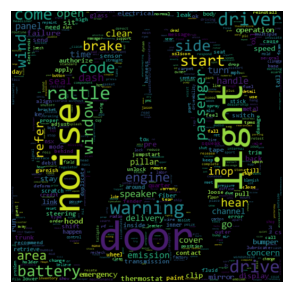

In [32]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.gca().set_axis_off()
fig.savefig(r'D:\temp\WordCloud2.png', facecolor='black', dpi=300, pad_inches=0, bbox_inches='tight')
plt.show()

### Let's create Pareto bar chart of Top 20 most frequent words

```wordcloud.process_text(str)``` returns a Python dictionary with words as keys and their frequencies as values, but it is not sorted in any order.  To sort the dict by values in descending order, use sorted() method which will return a list with key-value pairs saved as tuples:

In [33]:
import operator
word_freq = wc.process_text(text)
top20 = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)[:20]
top20

[('door', 90),
 ('noise', 80),
 ('light', 77),
 ('warning', 56),
 ('driver', 56),
 ('rattle', 55),
 ('drive', 50),
 ('come', 43),
 ('code', 38),
 ('battery', 37),
 ('side', 37),
 ('start', 36),
 ('window', 33),
 ('wind', 31),
 ('passenger', 29),
 ('brake', 26),
 ('area', 25),
 ('engine', 25),
 ('refer', 23),
 ('hear', 21)]

#### To make the Pareto chart, we will create a pandas dataframe and make a horizontal bar chart from it:

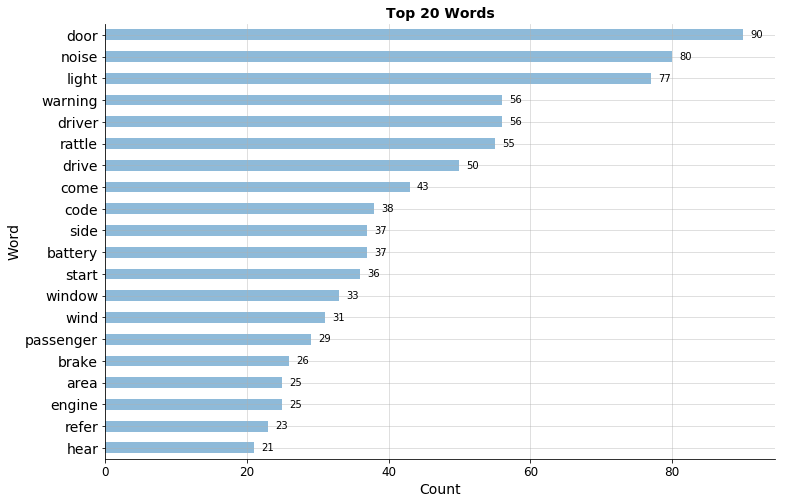

In [11]:
words = [word for word in wc.process_text(text).keys()]
counts =[count for count in wc.process_text(text).values()]

word_freq = pd.DataFrame(data={'word':words, 'qty':counts})

fig, axis = plt.subplots(figsize=(12, 8))

top_x = 20
word_freq.sort_values(by='qty', ascending=False)[:top_x].set_index('word').sort_values(by='qty').plot.barh(alpha=0.5, ax=axis)
axis.set_title("Top " +str(top_x) + " Words", fontsize=14, weight='bold')
axis.yaxis.set_tick_params(labelsize=14)
axis.xaxis.set_tick_params(labelsize=12)
axis.set_ylabel('Word', fontsize=14)
axis.set_xlabel('Count', fontsize=14)
axis.grid(True, alpha=0.5)
axis.legend().set_visible(False)
sns.despine()

# Logic needed to add qty labels to the right of each bar
x=[]
y=[]
for value in word_freq.sort_values(by='qty', ascending=False)[:top_x].sort_values(by='qty').values:
    x.append(value[1])
    y.append(value[0])

for p, value in zip(range(len(y)), y):
    axis.text(x=(value + 1), y=p, s=str(value), va='center')
##########################################################

plt.show()

### Finalize the horizontal bar chart by removing unnecessary x-axis ticks, labels, and grid lines

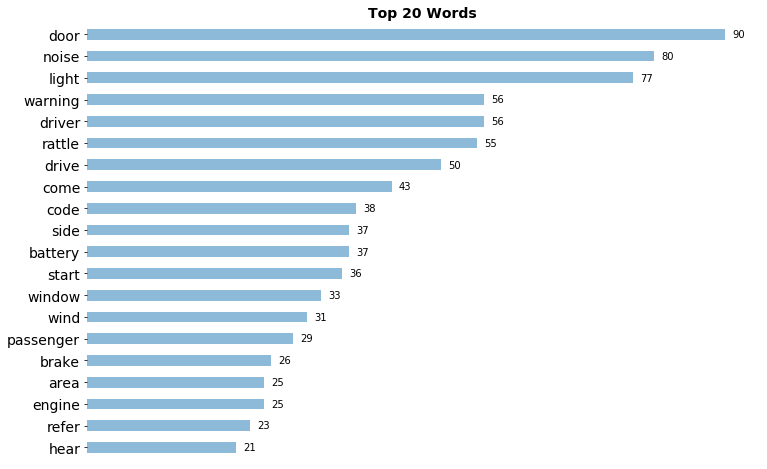

In [12]:
words = [word for word in wc.process_text(text).keys()]
counts =[count for count in wc.process_text(text).values()]

word_freq = pd.DataFrame(data={'word':words, 'qty':counts})

fig, axis = plt.subplots(figsize=(12, 8))

top_x = 20
word_freq.sort_values(by='qty', ascending=False)[:top_x].set_index('word').sort_values(by='qty').plot.barh(alpha=0.5, ax=axis)
axis.set_title("Top " +str(top_x) + " Words", fontsize=14, weight='bold')
axis.yaxis.set_tick_params(labelsize=14)
axis.set_xticks([])
axis.set_xlabel('')
axis.set_ylabel('')
axis.legend().set_visible(False)
axis.grid(False)
sns.despine(top=True, right=True, bottom=True, left=True)

# Logic needed to add qty labels to the right of each bar
x=[]
y=[]
for value in word_freq.sort_values(by='qty', ascending=False)[:top_x].sort_values(by='qty').values:
    x.append(value[1])
    y.append(value[0])

for p, value in zip(range(len(y)), y):
    axis.text(x=(value + 1), y=p, s=str(value), va='center')
##########################################################

plt.show()

### Top 50 Words

In [13]:
word_freq[['word', 'qty']].sort_values(by='qty', ascending=False).reset_index(drop=True)[:50]

,word,qty
0,door,90
1,noise,80
2,light,77
3,warning,56
4,driver,56
5,rattle,55
6,drive,50
7,come,43
8,code,38
9,side,37
